# Pandas: Formatos diferentes de entrada e saída (IO)

Certificação: 

<h2>Objetivo do treinamento:</h2>

<ul>
    <li>Aprofunde os seus conhecimentos em análise de dados com pandas/li>
    <li>Aprenda a trabalhar com diferentes tipos de dados, tanto na entrada como na saída (input/output)</li>
    <li>Desenvolva análises descritivas dos dados</li>
    <li>Saiba como cruzar os dados de DataFrames diferentes</li>
    <li>Explore os dados de um banco sql com pandas</li>
</ul>

<h2>Aulas</h2>

<ol>
    <li>Alunas e alunos com Json</li>
    <li>Criando cursos lendo html</li>
    <li>Escrevendo csv, json e html</li>
    <li>Lendo e escrevendo SQL</li>
    <li>Lendo e escrevendo excel</li>
</ol>

# 1. Alunas e alunos com Json

## Importe de módulos

In [1]:
# Python version

from platform import python_version

print('Python version:', python_version())

Python version: 3.8.5


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import html5lib
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

# Warnings remove 
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Carregando os nomes
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=500&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=500&sexo=m")

In [4]:
#Sortei 5 registros
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
207,JANE,0,75795,208,F
440,JUCILENE,0,30390,441,F
130,ELIZABETE,0,123594,131,F
14,JESSICA,0,456472,15,F
34,CRISTIANE,0,327248,35,F


In [5]:
#Quantiade de nomes
nomes_f.shape[0] + nomes_m.shape[0]

1000

In [6]:
nomes = pd.concat([nomes_f, nomes_m])['nome'].to_frame()

In [7]:
len(nomes)

1000

In [8]:
#Incluindo Id de alunos
np.random.seed(123)

total_alunos = len(nomes)

nomes['id_aluno'] = np.random.permutation(total_alunos) +1

nomes.head()

,nome,id_aluno
0,MARIA,132
1,ANA,204
2,FRANCISCA,51
3,ANTONIA,586
4,ADRIANA,139


In [9]:
#Incluindo email

dominios = ['@dominiodoemail.com.br', '@servicoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

nomes['email'] = nomes['nome'].str.cat(nomes['dominio']).str.lower()
nomes.head()


,nome,id_aluno,dominio,email
0,MARIA,132,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,204,@dominiodoemail.com.br,ana@dominiodoemail.com.br
2,FRANCISCA,51,@dominiodoemail.com.br,francisca@dominiodoemail.com.br
3,ANTONIA,586,@dominiodoemail.com.br,antonia@dominiodoemail.com.br
4,ADRIANA,139,@dominiodoemail.com.br,adriana@dominiodoemail.com.br


# 2. Criando cursos lendo html

In [10]:
# Criando a tabela cursos

url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos = cursos[0]
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [11]:
#Alterando o index de cursos

cursos.rename(columns={'Nome do curso':'nome_do_curso'}, inplace=True)
cursos['id'] = cursos.index +1
cursos.set_index('id', inplace=True)
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# 3. Escrevendo csv, json e html

In [12]:
# Atribuindo os matriculas aos alunos

nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,132,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,204,@dominiodoemail.com.br,ana@dominiodoemail.com.br,1
2,FRANCISCA,51,@dominiodoemail.com.br,francisca@dominiodoemail.com.br,1
3,ANTONIA,586,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
4,ADRIANA,139,@dominiodoemail.com.br,adriana@dominiodoemail.com.br,3


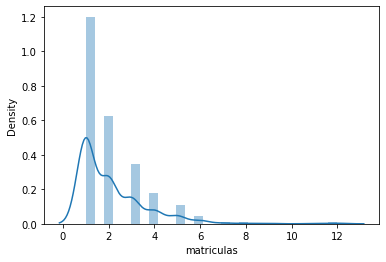

In [13]:
#Distribuição de quantidade de cursos que um aluno pode estar matriculado

sns.distplot(nomes['matriculas']);

In [14]:
#Selecionando cursos

todas_matriculas = []
x = np.random.rand(20)
prob= x/sum(x)

for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head()

,id_aluno,id_curso
0,132,3
1,204,8
2,51,6
3,586,13
4,139,6


In [15]:
#Quantiade de alunos em cada curso
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns ={
                                                    'id_aluno':'quantidade_de_alunos'})
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,172,Lógica de programação
2,200,Java para Web
3,125,C# para Web
4,3,Ruby on Rails
5,104,Cursos de Python


In [16]:
# Exportando em diferentes formatos

#csv
matriculas_por_curso.to_csv('exports/matriculas_por_curso.csv')

#json
matriculas_por_curso.to_json('exports/matriculas_por_curso.json')

#html
matriculas_por_curso.to_html('exports/matriculas_por_curso.html')


# Lendo e escrevendo SQL

In [17]:
#Criando um banco sql

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


In [18]:
#Consultando com uma query

query = 'select * from matriculas where quantidade_de_alunos >=100 limit 5'
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,172,Lógica de programação
1,2,200,Java para Web
2,3,125,C# para Web
3,5,104,Cursos de Python
4,6,156,PHP com MySql


In [19]:
#Consultando uma uma tabela e retornando colunas
pd.read_sql_table('matriculas', engine, columns=['id_curso','nome_do_curso']).head()

,id_curso,nome_do_curso
0,1,Lógica de programação
1,2,Java para Web
2,3,C# para Web
3,4,Ruby on Rails
4,5,Cursos de Python


In [20]:
#Subindo outra tabela no banco

nomes.to_sql('nomes', con=engine)
print(engine.table_names())

['matriculas', 'nomes']


# 5. Lendo e escrevendo excel

In [21]:
#Alunos da proxima turma

id_curso = 16
proxima_turma = matriculas.query(f"id_curso =={id_curso}")

proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['id_curso', 
                                                                                       'nome', 
                                                                                       'email']]
proxima_turma.head()

,id_curso,nome,email
id_aluno,,,
1,16,LUCAS,lucas@servicoemail.com
15,16,CAUE,caue@servicoemail.com
55,16,CONCEICAO,conceicao@dominiodoemail.com.br
64,16,LUDIMILA,ludimila@servicoemail.com
71,16,ADILSON,adilson@dominiodoemail.com.br


In [22]:
#Exportando excel
proxima_turma.to_excel('exports/proxima turma.xlsx', index=False)